In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import style
import util
import get_data, sklearn
import datetime as dt
%matplotlib inline
style.use('ggplot')

In [2]:
def plot_feature_importances(model_name, importances, feature_names, num_features=None,
                             fig_size=None, ax=None):
    features_importances = pd.DataFrame(sorted(zip(feature_names, importances),
                                           key = lambda tup: tup[1], reverse=True),
                                   columns=['features','importances'])
    data = features_importances[:num_features]
    data.plot('features','importances', kind='barh', ax=ax,
              color='blue', figsize=fig_size, legend = None)
    plt.gca().invert_yaxis() # reverse the order of features
    plt.ylabel('feature importances')
    if num_features:
        plt.title(model_name + '\nTop '+str(num_features))
    else:
        plt.title(model_name + '\nAll Features')

In [3]:
from mpl_finance import volume_overlay3
from matplotlib.dates import num2date
from matplotlib.dates import date2num
import matplotlib.mlab as mlab
import matplotlib.dates as mdates

In [4]:
import matplotlib
font = {'family' : 'DejaVu Sans',
        'size'   : 15}

matplotlib.rc('font', **font)

In [14]:
start_date = '1990-01-01'
end_date = '2010-12-31'
dates_partial = pd.date_range(start_date, end_date)

# Choose which stock to look at
stock = '^GSPC'

data_partial = get_data.get_data_csv(stock, dates_partial, redownload=False)
data_partial.dropna(inplace=True)
data_partial = util.remove_data_with_same_open_close(data_partial)

In [15]:
datanew_partial = util.calc_features_reg(data_partial, look_back=10, fee=0)
datanew_partial.dropna(inplace=True)
target_partial = datanew_partial['Close']
features_partial = datanew_partial.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], axis=1)

In [16]:
datanew_partial.head()

,Open,High,Low,Close,Volume,Adj Close,Open10d,Close10d,Open9d,Close9d,...,Close5d,Open4d,Close4d,Open3d,Close3d,Open2d,Close2d,Open1d,Close1d,Open0d
1990-01-16,337.000000,340.750000,333.369995,340.750000,186070000.0,340.750000,353.399994,359.690002,359.690002,358.760010,...,349.619995,349.619995,347.309998,347.309998,348.529999,348.529999,339.929993,339.929993,337.000000,337.000000
1990-01-17,340.769989,342.010010,336.260010,337.399994,170470000.0,337.399994,359.690002,358.760010,358.760010,355.670013,...,347.309998,347.309998,348.529999,348.529999,339.929993,339.929993,337.000000,337.000000,340.750000,340.769989
1990-01-18,337.399994,338.380005,333.980011,338.190002,178590000.0,338.190002,358.760010,355.670013,355.670013,352.200012,...,348.529999,348.529999,339.929993,339.929993,337.000000,337.000000,340.750000,340.769989,337.399994,337.399994
1990-01-19,338.190002,340.480011,338.190002,339.149994,185590000.0,339.149994,355.670013,352.200012,352.200012,353.790009,...,339.929993,339.929993,337.000000,337.000000,340.750000,340.769989,337.399994,337.399994,338.190002,338.190002
1990-01-22,339.140015,339.959991,330.279999,330.380005,148380000.0,330.380005,352.200012,353.790009,353.829987,349.619995,...,337.000000,337.000000,340.750000,340.769989,337.399994,337.399994,338.190002,338.190002,339.149994,339.140015


In [19]:
#Train-test data splits for roll-forward cross validation
from sklearn import preprocessing
features_scaled = pd.DataFrame(preprocessing.scale(features_partial))
from sklearn.model_selection import train_test_split
from LSTM_layers import LSTM_keras
X_train, X_test, y_train, y_test = train_test_split(features_scaled.values, target_partial, shuffle = False, test_size=0.2)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
lstm = LSTM_keras(input_shape = (X_train.shape[1], 1), nodes = [20, 20], l2 = 0.002, activation = 'linear', loss = 'mean_squared_error')
history = lstm.train(X_train, y_train, val_portion = 0.2, n_epochs = 10, n_batch = 120)

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype float32 were all converted to float64 by the scale function.
  app.launch_new_instance()


Train on 3378 samples, validate on 845 samples
Epoch 1/10
3378/3378 [==============================] - 3s 798us/step - loss: 754277.7977 - acc: 0.0000e+00 - val_loss: 1386213.8521 - val_acc: 0.0000e+00
Epoch 2/10
3378/3378 [==============================] - 1s 248us/step - loss: 753134.4721 - acc: 0.0000e+00 - val_loss: 1382568.6916 - val_acc: 0.0000e+00
Epoch 3/10
3378/3378 [==============================] - 1s 246us/step - loss: 748271.1343 - acc: 0.0000e+00 - val_loss: 1374664.3217 - val_acc: 0.0000e+00
Epoch 4/10
3378/3378 [==============================] - 1s 250us/step - loss: 744522.3011 - acc: 0.0000e+00 - val_loss: 1370511.2522 - val_acc: 0.0000e+00
Epoch 5/10
3378/3378 [==============================] - 1s 243us/step - loss: 742865.3193 - acc: 0.0000e+00 - val_loss: 1368375.6805 - val_acc: 0.0000e+00
Epoch 6/10
3378/3378 [==============================] - 1s 244us/step - loss: 741635.7872 - acc: 0.0000e+00 - val_loss: 1366646.2034 - val_acc: 0.0000e+00
Epoch 7/10
3378/3378 [=

In [8]:
model = lstm.clf
filename = 'saved_model.sav'
import pickle
pickle.dump(model, open(filename,'wb'))

In [9]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
model_trained = pickle.load(open(filename,'rb'))
lstm.clf = model_trained
pred = lstm.predict(X_test)

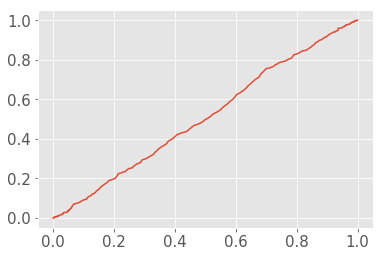

0.5102449307598673

In [11]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
plt.plot(fpr, tpr)
plt.show()
metrics.auc(fpr, tpr)

In [12]:
# credit: Hye Joo Han
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root_mean_squared_error ($)')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label='Validation Loss')
    plt.legend()

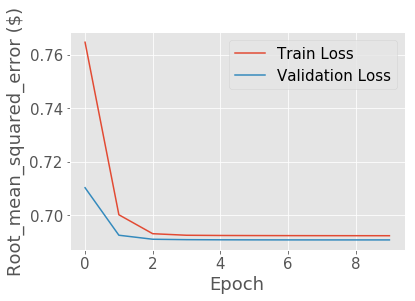

In [13]:
plot_history(history)

In [14]:
test_data = data_partial.iloc[int(X_train.shape[0]*0.8) + 1:int(X_train.shape[0])+1]

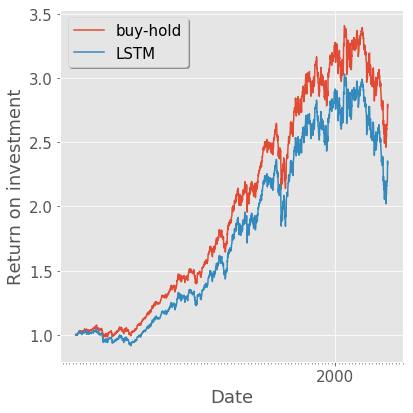

2.3303732587449457

In [15]:
util.gain_plot_from_test_data(test_data, pred, fee=10, model_name = "LSTM")